# 1. Import Libraries

In [1]:
# Import libraries
import pandas as pd # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
from matplotlib.colors import ListedColormap # type: ignore
import seaborn as sns # type: ignore
from sklearn.preprocessing import LabelEncoder # type: ignore
from sklearn.preprocessing import StandardScaler # type: ignore
from sklearn.model_selection import train_test_split, GridSearchCV# type: ignore
from sklearn.tree import DecisionTreeClassifier # type: ignore
from sklearn import metrics # type: ignore
from sklearn.metrics import accuracy_score # type: ignore
from sklearn.metrics import classification_report # type: ignore
from sklearn.metrics import precision_recall_curve # type: ignore
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # type: ignore
from sklearn.metrics import f1_score # type: ignore

1. max_depth: Think of this as the tree’s height. It controls how deep the tree can grow. If it’s too deep, the tree becomes too specific and might memorize the training data (overfitting). If it’s too shallow, the tree might miss important patterns (underfitting). You need to find that sweet spot where the tree captures just the right amount of complexity.

2. min_samples_split: This hyperparameter defines the minimum number of samples required to split an internal node. In other words, it sets a limit for when the tree is allowed to keep splitting. If you set this too low, the tree keeps splitting down to tiny, uninformative leaves. Set it higher, and the tree becomes more general, helping prevent overfitting.

3. min_samples_leaf: This controls the minimum number of samples that should be in a leaf node. The higher the value, the more general the tree becomes. It helps ensure that your final decision isn’t based on just a handful of data points, making your model more stable.

4. criterion: Here’s the decision-making part. This hyperparameter defines how the tree measures the quality of a split. The two most common criteria are gini (used for classification, it measures impurity) and entropy (also used for classification but based on information gain). You might be wondering: "Which one should I use?" For most practical cases, gini works well, but entropy can sometimes offer more precise splits at the cost of additional computation.

5. max_features: This limits the number of features the tree considers when making a split. For instance, if you have 20 features but set max_features = 5, the tree will only look at 5 random features at each split. It adds an element of randomness, which can prevent the model from overfitting by focusing too much on specific features.

# 2. Import Dataset

In [2]:
# Read dataset
df_net = pd.read_csv('../features_data/multiotsu/with_deletion/YUV + LBP + GLRLM + TAMURA.csv')
df_net.head()

,Image,mean_y,mean_u,mean_v,std_y,std_u,std_v,skew_y,skew_u,skew_v,...,LGLRE_deg135,HGL_deg135,SRLGLE_deg135,SRHGLE_deg135,LRHGLE_deg135,coarseness_tamura,contrast_tamura,directionality_tamura,roughness_tamura,label
0,AAA1,40.928151,0.140916,9.810296,89.498630,1.160786,20.503002,1.778283,1.364343,1.776544,...,0.142083,27034.211378,0.109278,24976.536911,99979.872181,5.388526,62.558426,450.341404,67.946951,normal
1,AAB1,48.089579,0.146788,12.165564,94.151059,1.082126,23.150357,1.488098,1.343907,1.506640,...,0.133517,29700.714353,0.101089,28390.428736,35857.204313,6.021835,70.186678,474.581575,76.208513,abnormal
2,AAE1,46.800192,-0.966443,11.779170,93.471977,2.447886,23.164161,1.527636,-2.991104,1.551774,...,0.134276,32100.903474,0.095907,29096.427474,49395.423276,6.946692,69.065127,595.749818,76.011819,abnormal
3,AAG1,24.710254,-1.031737,9.066788,65.684864,2.950731,23.085059,2.384687,-3.274821,2.415081,...,0.204767,14482.550850,0.141877,13504.625152,19772.511665,7.060863,40.752497,571.298552,47.813360,normal
4,AAI1,51.051253,0.288732,14.333293,94.154097,1.593049,25.396978,1.359376,1.776915,1.380479,...,0.166318,23324.326007,0.123198,22332.038125,27858.685204,6.849154,72.334632,546.581074,79.183786,abnormal


# 3. Data Analysis / Preprocessing

## Get required data

In [3]:
# Get required data
df_net.drop(columns = ['Image'], inplace=True)
df_net.head()

,mean_y,mean_u,mean_v,std_y,std_u,std_v,skew_y,skew_u,skew_v,mean_lbp,...,LGLRE_deg135,HGL_deg135,SRLGLE_deg135,SRHGLE_deg135,LRHGLE_deg135,coarseness_tamura,contrast_tamura,directionality_tamura,roughness_tamura,label
0,40.928151,0.140916,9.810296,89.498630,1.160786,20.503002,1.778283,1.364343,1.776544,218.721655,...,0.142083,27034.211378,0.109278,24976.536911,99979.872181,5.388526,62.558426,450.341404,67.946951,normal
1,48.089579,0.146788,12.165564,94.151059,1.082126,23.150357,1.488098,1.343907,1.506640,210.700112,...,0.133517,29700.714353,0.101089,28390.428736,35857.204313,6.021835,70.186678,474.581575,76.208513,abnormal
2,46.800192,-0.966443,11.779170,93.471977,2.447886,23.164161,1.527636,-2.991104,1.551774,218.999966,...,0.134276,32100.903474,0.095907,29096.427474,49395.423276,6.946692,69.065127,595.749818,76.011819,abnormal
3,24.710254,-1.031737,9.066788,65.684864,2.950731,23.085059,2.384687,-3.274821,2.415081,217.464159,...,0.204767,14482.550850,0.141877,13504.625152,19772.511665,7.060863,40.752497,571.298552,47.813360,normal
4,51.051253,0.288732,14.333293,94.154097,1.593049,25.396978,1.359376,1.776915,1.380479,196.777551,...,0.166318,23324.326007,0.123198,22332.038125,27858.685204,6.849154,72.334632,546.581074,79.183786,abnormal


## Describe Data

In [4]:
# Describe data
df_net.describe()

,mean_y,mean_u,mean_v,std_y,std_u,std_v,skew_y,skew_u,skew_v,mean_lbp,...,RP_deg135,LGLRE_deg135,HGL_deg135,SRLGLE_deg135,SRHGLE_deg135,LRHGLE_deg135,coarseness_tamura,contrast_tamura,directionality_tamura,roughness_tamura
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,...,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,39.446701,-0.243367,11.521561,80.227425,2.276244,22.530548,2.133305,-1.282701,2.150360,215.698517,...,0.566697,0.169785,23064.946536,0.121303,21206.533974,40440.711323,6.381902,57.815501,499.034830,64.197403
std,19.515974,1.260577,6.053552,19.379576,1.305998,6.529223,1.343704,3.012131,1.320760,13.616423,...,0.216746,0.047521,7088.103944,0.032808,5923.081059,29080.200933,1.067311,22.604836,93.967991,23.310274
min,2.789696,-3.895290,0.834084,23.813596,0.293985,6.346832,0.551931,-10.977392,0.580804,179.617472,...,0.110050,0.078347,6378.687291,0.056826,6280.280403,6796.221867,3.368361,7.877274,220.703441,11.563647
25%,23.769516,-0.949581,7.212868,66.837449,1.266781,18.908959,1.258478,-2.990368,1.284510,206.456725,...,0.411243,0.135815,17434.176317,0.097924,16394.535484,22849.373391,5.861616,40.116121,466.949920,46.712899
50%,39.157514,-0.203029,11.280444,84.229314,2.007749,23.259824,1.772329,-1.827411,1.798359,214.784437,...,0.560557,0.163223,23001.507010,0.114463,21286.658635,31777.015726,6.563546,59.690172,495.549540,65.698783
75%,53.634134,0.256056,15.245536,94.734776,3.030164,26.862057,2.529372,1.384267,2.534420,223.960381,...,0.700653,0.200012,28165.122080,0.142047,25507.827814,44763.612760,7.060690,74.992956,562.794289,81.867690
max,82.401215,4.553267,29.087677,113.783798,6.546205,37.198231,9.039728,6.701643,8.749209,245.502290,...,1.100021,0.299020,42368.103966,0.203990,32873.567197,210743.874233,8.307875,103.627715,670.953581,110.157760


## Label encoding

In [5]:
# Label encoding
le = LabelEncoder()
df_net['label']= le.fit_transform(df_net['label'])

## Correlation Matrix

<Axes: >

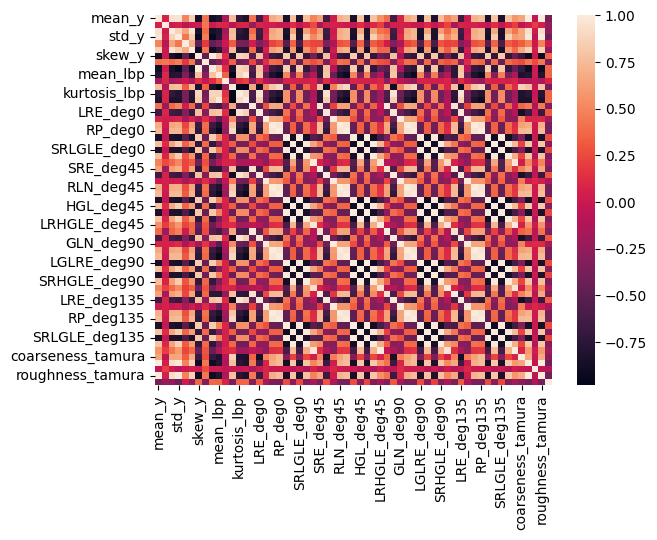

In [6]:
# Correlation matrix
df_net.corr()
sns.heatmap(df_net.corr())

# 4. Split Data

## Independent / Dependent variables

In [7]:
# Split data into dependent/independent variables
X = df_net.iloc[:, :-1]
y = df_net.iloc[:, -1]

In [8]:
X.head()

,mean_y,mean_u,mean_v,std_y,std_u,std_v,skew_y,skew_u,skew_v,mean_lbp,...,RP_deg135,LGLRE_deg135,HGL_deg135,SRLGLE_deg135,SRHGLE_deg135,LRHGLE_deg135,coarseness_tamura,contrast_tamura,directionality_tamura,roughness_tamura
0,40.928151,0.140916,9.810296,89.498630,1.160786,20.503002,1.778283,1.364343,1.776544,218.721655,...,0.521693,0.142083,27034.211378,0.109278,24976.536911,99979.872181,5.388526,62.558426,450.341404,67.946951
1,48.089579,0.146788,12.165564,94.151059,1.082126,23.150357,1.488098,1.343907,1.506640,210.700112,...,0.567831,0.133517,29700.714353,0.101089,28390.428736,35857.204313,6.021835,70.186678,474.581575,76.208513
2,46.800192,-0.966443,11.779170,93.471977,2.447886,23.164161,1.527636,-2.991104,1.551774,218.999966,...,0.501793,0.134276,32100.903474,0.095907,29096.427474,49395.423276,6.946692,69.065127,595.749818,76.011819
3,24.710254,-1.031737,9.066788,65.684864,2.950731,23.085059,2.384687,-3.274821,2.415081,217.464159,...,0.437389,0.204767,14482.550850,0.141877,13504.625152,19772.511665,7.060863,40.752497,571.298552,47.813360
4,51.051253,0.288732,14.333293,94.154097,1.593049,25.396978,1.359376,1.776915,1.380479,196.777551,...,0.836638,0.166318,23324.326007,0.123198,22332.038125,27858.685204,6.849154,72.334632,546.581074,79.183786


In [9]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: label, dtype: int32

## Train / Test split

In [10]:
# Split data into test/train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

# 5. Feature scaling

In [11]:
# Scale dataset
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# 6. Define the Decision Tree model

In [12]:
# Decision Tree Classification
classifier = DecisionTreeClassifier()

# 7. Create Param Grid

In [13]:
param_grid = {
    'max_depth': np.arange(2, 52, 2),
    'min_samples_split': np.arange(2, 32, 2),
    'max_features': np.arange(5, 50, 2),
    'criterion': ['gini', 'entropy']
}

#   8. Cross Validation

In this step, we’re applying 5-fold cross-validation, which means the dataset is split into five parts, and the model is trained and validated five times — each time on a different fold. This gives a more reliable estimate of the model’s performance across different data splits.

In [14]:
grid_search = GridSearchCV(
    estimator=classifier, 
    param_grid=param_grid, 
    cv=5,  # 5-fold cross-validation
    scoring='accuracy')

# 9. Do GridSearch

In [15]:
# Fit the GridSearchCV model
grid_search.fit(X_train, y_train)

# Print the best parameters and best accuracy
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 20, 'max_features': 5, 'min_samples_split': 2}
Best Accuracy: 0.7351778656126481


In [16]:
# Evaluate the best model on the test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_accuracy = best_model.score(X_test, y_test)

print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.7346938775510204


## 10. Evaluate Result

In [17]:
cm = confusion_matrix(y_test, y_pred)

tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
recall = tp / (tp + fn)
precision = tp / (tp + fp)
accuracy = (tp + tn) / (tp + tn + fp + fn)
f1 = 2 * (precision * recall) / (precision + recall)

In [18]:
performance_metrics = {
    'Metric': ['Accuracy', 'Precision', 'Specificity', 'Recall', 'F1 Score'],
    'Value': [accuracy, precision, specificity, recall, f1]
}
df_performance = pd.DataFrame(performance_metrics)

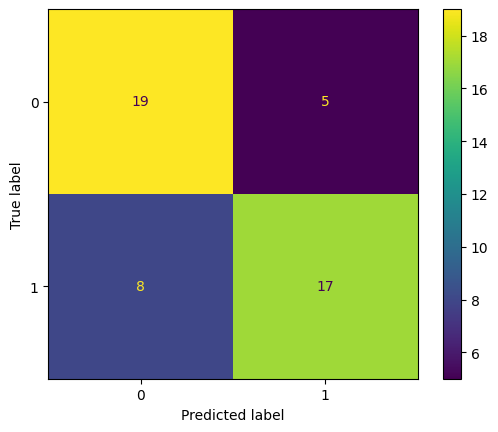

In [19]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()